In [ ]:
from os import getcwd

import matplotlib.pyplot as plt
from numpy import arange, log10
import pandas as pd

fig, ax = plt.subplots(figsize=(11.69, 8.27))

input_df = pd.read_csv(getcwd() + '/datos/galaxias_13.csv', error_bad_lines=False)

# Obtiene el valor maximo y minimo de massWeightedAge
minWeightAge = min(input_df['massWeightedAge'])
maxWeightAge = max(input_df['massWeightedAge'])

# Divide en porciones
arrayWeightAge = arange(minWeightAge, maxWeightAge, 0.4)

# Obtiene los valores de masa del ultimo instante (step)
dfWeightAge = input_df[input_df['massWeightedAge'] > arrayWeightAge[-1]]
# Obtiene la fila de la galaxia con mas masa del ultimo instante
lastGalaxyRow = input_df[input_df['stellarMass'].isin([max(dfWeightAge['stellarMass'])])]

# Si tenemos dos valores (posiblemente por un error de redondeo obtenemos el más antiguo)
if lastGalaxyRow['treeId'].size != 1:
    lastGalaxyRow = lastGalaxyRow[lastGalaxyRow['massWeightedAge'].isin([max(lastGalaxyRow['massWeightedAge'])])]
    
# Obtiene el identificador del arbol
descendantId = lastGalaxyRow['galaxyID']
flag = True
main_stellarMass = []
main_weightedAge = []
main_ids = []
main_snapnums = []
# Primera iteracion
temp_df = input_df[input_df['descendantId'].isin([descendantId])]
main_stellarMass.append(temp_df['stellarMass'])
main_weightedAge.append(temp_df['massWeightedAge'])
main_ids.append(int(descendantId))
main_snapnums.append(int(temp_df['snapnum']))
while flag:
    # Primera iteracion    
    nextGalaxyID = temp_df['galaxyID']
    main_ids.append(int(nextGalaxyID))
    temp_df = input_df[input_df['descendantId'].isin([nextGalaxyID])]
    # Para el bucle si ya no hay datos
    if temp_df.empty:
        flag = False
    try:
        main_stellarMass.append(float(temp_df['stellarMass']))
        main_weightedAge.append(float(temp_df['massWeightedAge']))
        # main_snapnums.append(int(temp_df['snapnum']))
    except TypeError:
        pass  # Las series estan vacias

# Invierte la escala
# main_stellarMass = [log10(i) for i in main_stellarMass]
main_weightedAge = [abs(i - max(lastGalaxyRow['massWeightedAge'])) for i in main_weightedAge]

# Plotea los valores del arbol

#
# Ahora vamos con la total
# 
main_df = pd.read_csv(getcwd() + '/datos_completos/galaxias_13.csv', error_bad_lines=False)
total_stellarMass = []
total_weightedAge = []
# Obtenemos los progenitores del treeId
for idx, snapnum_ in enumerate(main_snapnums):
    temp_df = input_df[input_df['snapnum'].isin([snapnum_])]
    total_stellarMass.append(temp_df['stellarMass'].sum())
    total_weightedAge.append(temp_df['massWeightedAge'].sum())
    # progenitors_df = input_df[input_df['galaxyID'] > temp_df['galaxyID']]
    
total_weightedAge = [abs(i - max(lastGalaxyRow['massWeightedAge'])) for i in total_weightedAge]
main_snapnums = [abs(i - max(main_snapnums)) for i in main_snapnums]

# Plotea las dos graficas

# ax.plot(total_weightedAge, total_stellarMass)
ax.plot(main_weightedAge, main_stellarMass)





201    4000015000000
Name: galaxyID, dtype: int64


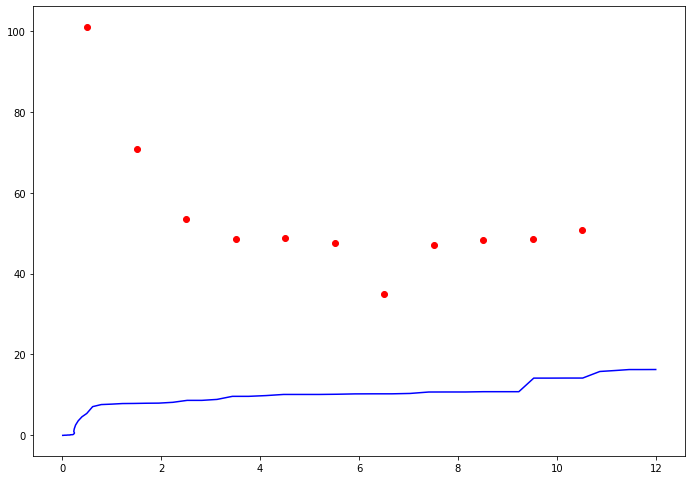

In [18]:
from os import getcwd

import matplotlib.pyplot as plt
from numpy import arange, log10, nan
import pandas as pd

fig, ax = plt.subplots(figsize=(11.69, 8.27))

main_df = pd.read_csv(getcwd() + '/datos/galaxias_13.csv')

# Obtiene el valor maximo y minimo de massWeightedAge
minWeightAge = min(main_df['massWeightedAge'])
maxWeightAge = max(main_df['massWeightedAge'])

# Divide en porciones
arrayWeightAge = arange(minWeightAge, maxWeightAge, 0.05)
longArrayWeightAge = arange(minWeightAge, maxWeightAge, 1)

# Obtiene los valores de masa del ultimo instante (step)
dfWeightAge = main_df[main_df['massWeightedAge'] > arrayWeightAge[-1]]
# Obtiene la fila de la galaxia con mas masa del ultimo instante
lastGalaxyRow = main_df[main_df['stellarMass'].isin([max(dfWeightAge['stellarMass'])])]

# Si tenemos dos valores (posiblemente por un error de redondeo obtenemos el más antiguo)
if lastGalaxyRow['treeId'].size != 1:
    lastGalaxyRow = lastGalaxyRow[lastGalaxyRow['massWeightedAge'].isin([max(lastGalaxyRow['massWeightedAge'])])]
    
#
# Obtenemos los valores del arbol
#
descendantId = lastGalaxyRow['galaxyID']
print(descendantId)
flag = True

descendant_ids_dict = {}
main_ids = []
main_snapnums = []
# Primera iteracion
temp_df = main_df[main_df['descendantId'].isin([descendantId])]
main_ids.append(int(descendantId))
descendant_ids_dict[int(descendantId)] = list(range(int(descendantId), int(temp_df['lastProgenitorId']), 1))
while flag:  
    nextGalaxyID = int(temp_df['galaxyID'])
    main_ids.append(nextGalaxyID)
    temp_df = main_df[main_df['descendantId'].isin([nextGalaxyID])]
    # Para el bucle si ya no hay datos
    if temp_df.empty:
        flag = False
        break
    descendant_ids_dict[nextGalaxyID] = list(range(int(nextGalaxyID), int(temp_df['lastProgenitorId']), 1))

#
# Obtenemos la masa y edad de la principal
# 
main_df = main_df[main_df['galaxyID'].isin(main_ids)]
total_df = pd.read_csv(getcwd() + '/datos_completos/galaxias_13.csv')

main_stellarMass = []
main_weightedAge = []
total_stellarMass = []
total_weightedAge = []

for idx, row in main_df.iterrows():
    main_stellarMass.append(float(row['stellarMass']))
    main_weightedAge.append(float(row['massWeightedAge']))


# Metodo objeto a objeto
# for idx, row in total_df.iterrows():
#     total_stellarMass.append(float(row['stellarMass']))
#     total_weightedAge.append(float(row['massWeightedAge']))

# Metodo instante a instante
for idx, age_ in enumerate(longArrayWeightAge[:-1]):
    lower_weightedAge = age_
    upper_weightedAge = longArrayWeightAge[idx+1]
    # Obtiene los datos del instante temporal del branch principal
    temp_total_df = total_df[total_df['massWeightedAge'] > lower_weightedAge]
    temp_total_df = temp_total_df[upper_weightedAge > temp_total_df['massWeightedAge']]
    # Agrega los valores de masa y edad a las listas del branch principal
    if temp_total_df['stellarMass'].sum() is not nan:
        total_stellarMass.append(temp_total_df['stellarMass'].sum())
        total_weightedAge.append((lower_weightedAge+upper_weightedAge)/2)

# Recorremos todos los instantes temporales para obtener las gráficas
#for idx, id_ in enumerate(main_df):
    # print(id_)
    # print(type(id_))
    # print(descendant_ids_dict[id_])
    """
    # Obtiene la grafica de los descendientes
    upper_weightedAge = arrayWeightAge[idx+1]

    # Obtiene los datos del instante temporal del branch principal
    temp_main_df = main_df[main_df['massWeightedAge'] > lower_weightedAge]
    temp_main_df = temp_main_df[upper_weightedAge > temp_main_df['massWeightedAge']]
    # Agrega los valores de masa y edad a las listas del branch principal
    if temp_main_df['stellarMass'].mean() is not nan:
        main_stellarMass.append(temp_main_df['stellarMass'].mean())
        main_weightedAge.append((lower_weightedAge+upper_weightedAge)/2)
    """
# Invierte la escala
# main_stellarMass = [log10(i) for i in main_stellarMass]
# main_weightedAge = [abs(i - max(lastGalaxyRow['massWeightedAge'])) for i in main_weightedAge]

#
# Obtenemos la masa y edad los progenitores
# 
# total_df = pd.read_csv(getcwd() + '/datos_completos/galaxias_13.csv')
# for idx, lower_weightedAge in enumerate(longArrayWeightAge[:-1]):
    # Obtiene la grafica de los descendientes
    # upper_weightedAge = longArrayWeightAge[idx+1]

    # Obtiene los datos de los progenitores
    # temp_total_df = total_df[total_df['massWeightedAge'] > lower_weightedAge]
    # temp_total_df = temp_total_df[upper_weightedAge > temp_total_df['massWeightedAge']]
    # Agrega los valores de masa y edad a las listas del branch principal
    # if temp_total_df['stellarMass'].sum() is not nan:
        # total_stellarMass.append(temp_total_df['stellarMass'].sum())
        # total_weightedAge.append((lower_weightedAge+upper_weightedAge)/2)

# Invierte la escala
# main_stellarMass = [log10(i) for i in main_stellarMass]
# main_weightedAge = [abs(i - max(lastGalaxyRow['massWeightedAge'])) for i in main_weightedAge]

# Plotea las dos graficas

ax.scatter(total_weightedAge, total_stellarMass, linestyle='solid',color='red')
ax.plot(main_weightedAge, main_stellarMass, linestyle='solid',color='blue')

plt.savefig('test.png')

In [ ]:
"""
# Plotea las galaxias por posicion 
#


from os import getcwd

import matplotlib.pyplot as plt
from numpy import arange, log10, nan
import pandas as pd

fig, ax = plt.subplots(figsize=(11.69, 8.27))

main_df = pd.read_csv(getcwd() + '/datos/galaxias_13.csv')

ax.scatter(main_df['x'], main_df['y'])



# Obtiene el valor maximo y minimo de massWeightedAge
minWeightAge = min(main_df['massWeightedAge'])
maxWeightAge = max(main_df['massWeightedAge'])

# Divide en porciones
arrayWeightAge = arange(minWeightAge, maxWeightAge, 0.05)
longArrayWeightAge = arange(minWeightAge, maxWeightAge, 0.5)

# Obtiene los valores de masa del ultimo instante (step)
dfWeightAge = main_df[main_df['massWeightedAge'] > arrayWeightAge[-1]]
# Obtiene la fila de la galaxia con mas masa del ultimo instante
lastGalaxyRow = main_df[main_df['stellarMass'].isin([max(dfWeightAge['stellarMass'])])]

# Si tenemos dos valores (posiblemente por un error de redondeo obtenemos el más antiguo)
if lastGalaxyRow['treeId'].size != 1:
    lastGalaxyRow = lastGalaxyRow[lastGalaxyRow['massWeightedAge'].isin([max(lastGalaxyRow['massWeightedAge'])])]
    
#
# Obtenemos los valores del arbol
#
descendantId = lastGalaxyRow['galaxyID']
flag = True

descendant_ids_dict = {}
main_ids = []
main_snapnums = []
# Primera iteracion
temp_df = main_df[main_df['descendantId'].isin([descendantId])]
main_ids.append(int(descendantId))
descendant_ids_dict[int(descendantId)] = list(range(int(descendantId), int(temp_df['lastProgenitorId']), 1))
while flag:  
    nextGalaxyID = int(temp_df['galaxyID'])
    main_ids.append(nextGalaxyID)
    temp_df = main_df[main_df['descendantId'].isin([nextGalaxyID])]
    # Para el bucle si ya no hay datos
    if temp_df.empty:
        flag = False
        break
    descendant_ids_dict[nextGalaxyID] = list(range(int(nextGalaxyID), int(temp_df['lastProgenitorId']), 1))

#
# Obtenemos la masa y edad de la principal
# 
main_df = main_df[main_df['galaxyID'].isin(main_ids)]
# main_stellarMass = []
# main_weightedAge = []
# total_stellarMass = []
# total_weightedAge = []
main_x = []
main_y = []
main_z = []
# Recorremos todos los instantes temporales para obtener las gráficas
for idx, id_ in enumerate(main_ids):
    temp_main_df = main_df[main_df['galaxyID'].isin([id_])]
    main_x.append(float(temp_main_df['x']))
    main_y.append(float(temp_main_df['y']))
    print(float(temp_main_df['x']), float(temp_main_df['y']))
    
    
    # Obtiene la grafica de los descendientes
    upper_weightedAge = arrayWeightAge[idx+1]

    # Obtiene los datos del instante temporal del branch principal
    temp_main_df = main_df[main_df['massWeightedAge'] > lower_weightedAge]
    temp_main_df = temp_main_df[upper_weightedAge > temp_main_df['massWeightedAge']]
    # Agrega los valores de masa y edad a las listas del branch principal
    if temp_main_df['stellarMass'].mean() is not nan:
        main_stellarMass.append(temp_main_df['x'].mean())
        main_weightedAge.append((lower_weightedAge+upper_weightedAge)/2)
    
# Invierte la escala
# main_stellarMass = [log10(i) for i in main_stellarMass]
# main_weightedAge = [abs(i - max(lastGalaxyRow['massWeightedAge'])) for i in main_weightedAge]


#
# Obtenemos la masa y edad los progenitores
# 
total_df = pd.read_csv(getcwd() + '/datos_completos/galaxias_13.csv')
for idx, lower_weightedAge in enumerate(longArrayWeightAge[:-1]):
    # Obtiene la grafica de los descendientes
    upper_weightedAge = longArrayWeightAge[idx+1]

    # Obtiene los datos de los progenitores
    temp_total_df = total_df[total_df['massWeightedAge'] > lower_weightedAge]
    temp_total_df = temp_total_df[upper_weightedAge > temp_total_df['massWeightedAge']]
    # Agrega los valores de masa y edad a las listas del branch principal
    if temp_total_df['stellarMass'].sum() is not nan:
        total_stellarMass.append(temp_total_df['stellarMass'].sum())
        total_weightedAge.append((lower_weightedAge+upper_weightedAge)/2)

# Invierte la escala
# main_stellarMass = [log10(i) for i in main_stellarMass]
# main_weightedAge = [abs(i - max(lastGalaxyRow['massWeightedAge'])) for i in main_weightedAge]

# Plotea las dos graficas

ax.scatter(total_weightedAge, total_stellarMass, linestyle='solid',color='red')
ax.plot(main_weightedAge, main_stellarMass, linestyle='solid',color='blue')

# ax.scatter(main_x, main_y)
"""